# marketing_campaign_analysis

Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

## Objectives
Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. Explain why these metrics were choosen.

2. Based on the provided data, recommend ways the campaign strategy can be adjusted in the future to improve performance.

3. Explain how campaign performance might change if it were run in month 6 rather than month 3. Provide an incremental number versus your result in Question #1.

In [2]:
# import dependencies
import pandas as pd

In [3]:
# read in the data
calendar_df = pd.read_csv('./resources/datasets/calendar_data.csv')
client_df = pd.read_csv('./resources/datasets/client_data.csv')
deposit_df = pd.read_csv('./resources/datasets/deposit_data.csv')

In [4]:
# view client data
client_df.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [5]:
# view deposit data
deposit_df.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [6]:
# view calendar data
calendar_df.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [7]:
# merge the data
df = pd.merge(client_df, deposit_df, on='client_id')
df = pd.merge(df, calendar_df, left_on='deposit_date', right_on="gregorian_date")
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


In [8]:
# Show columns with values that are null
df.isnull().any()

client_id                     False
client_geographical_region    False
client_residence_status       False
client_age                    False
deposit_type                  False
deposit_amount                False
deposit_cadence               False
deposit_date                  False
gregorian_date                False
month_name                    False
dtype: bool

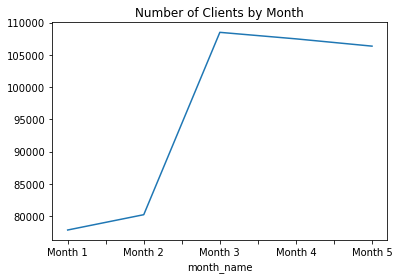

In [9]:
# Plot the number of clients by month
df.groupby('month_name').client_id.count().plot(kind='line', title='Number of Clients by Month')

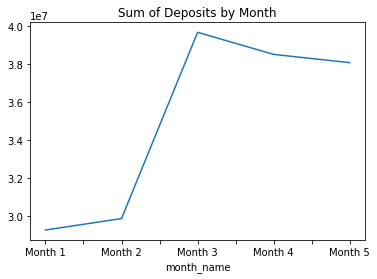

In [10]:
# Plot the sum of deposits that occurred each month
df.groupby('month_name').deposit_amount.sum().plot(kind='line', title='Sum of Deposits by Month')

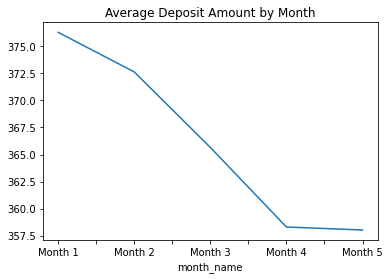

In [11]:
# Plot average deposit amount by month
df.groupby('month_name').deposit_amount.mean().plot(kind='line', title='Average Deposit Amount by Month')

In [12]:
# Show summary statistics for deposit amount
df['deposit_amount'].describe()


count    480394.000000
mean        365.207130
std         346.644434
min           0.010000
25%         200.000000
50%         290.000000
75%         452.000000
max       30000.000000
Name: deposit_amount, dtype: float64

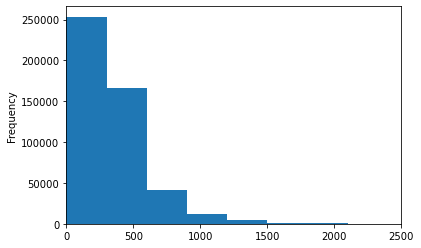

In [13]:
# View the distribution of deposit amount
# Adjust the x-axis to see the distribution
df['deposit_amount'].plot.hist(bins=100, xlim=(0, 2500))

In [14]:
# Show columns that have depost_amount > 2500
large_deposits_df = df[df['deposit_amount'] > 2500]
large_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.00,Extra,2019-07-11,2019-07-11,Month 2
1078,309314840969939,South,Rent,64,Actual Deposit,6050.00,Extra,2019-07-11,2019-07-11,Month 2
1208,372381734976030,Midwest,Own,74,Actual Deposit,3547.45,Extra,2019-07-11,2019-07-11,Month 2
1495,92778941514814,West,Rent,34,Actual Deposit,4130.00,Monthly,2019-10-19,2019-10-19,Month 5
1496,92778941514814,West,Rent,34,Scheduled Deposit,4130.00,Monthly,2019-10-19,2019-10-19,Month 5


In [15]:
# Show the number of clients that made a deposit > 2500
large_deposits_df.client_id.nunique()

407

In [16]:
# Create new dataframe where deposit amount < 2500
small_deposits_df = df[df['deposit_amount'] < 2500]
small_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2
5,55107102575545,Midwest,Own,83,Actual Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


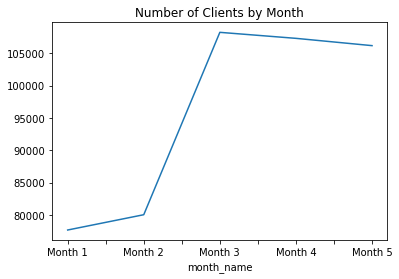

In [17]:
# Plot the number of clients by month
small_deposits_df.groupby('month_name').client_id.count().plot(kind='line', title='Number of Clients by Month')


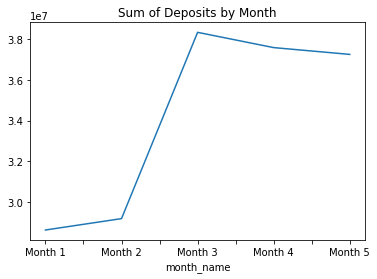

In [18]:
# Plot the sum of deposits that occurred each month
small_deposits_df.groupby('month_name').deposit_amount.sum().plot(kind='line', title='Sum of Deposits by Month')

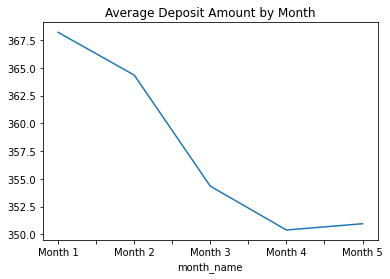

In [19]:
# Plot average deposit amount by month
small_deposits_df.groupby('month_name').deposit_amount.mean().plot(kind='line', title='Average Deposit Amount by Month')

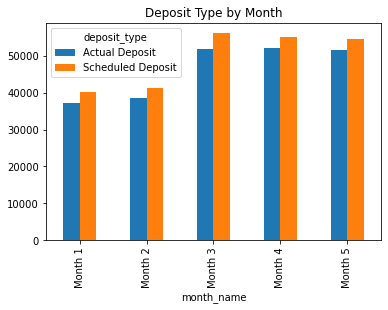

In [20]:
# Graph deposit_type by month
small_deposits_df.groupby(['month_name', 'deposit_type']).client_id.count().unstack().plot(kind='bar', title='Deposit Type by Month')

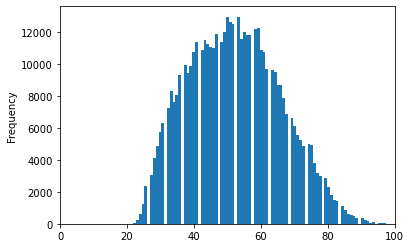

In [24]:
# View client_age distribution
small_deposits_df['client_age'].plot.hist(bins=100, xlim=(0, 100))

In [25]:
# Bin client_age into 10 year intervals
small_deposits_df['client_age_bin'] = pd.cut(small_deposits_df['client_age'], 
                                             bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                             labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

/Users/avatarjoshi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
# View dataframe with client_age_bin
small_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name,client_age_bin
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2,20-30
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2,20-30
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2,80-90
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2,80-90
5,55107102575545,Midwest,Own,83,Actual Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2,80-90


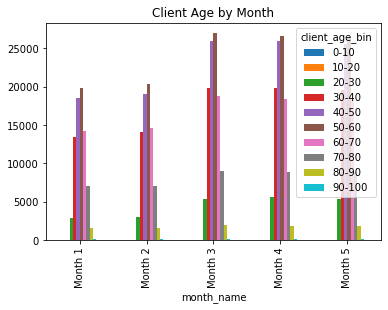

In [27]:
# Graph client_age_bin by month
small_deposits_df.groupby(['month_name', 'client_age_bin']).client_id.count().unstack().plot(kind='bar', title='Client Age by Month')